# 📈 Stock Price Prediction using LSTM

This project is an end-to-end implementation of a **Stock Price Prediction** system using historical stock data and **LSTM (Long Short-Term Memory)** neural networks. The goal is to build a deep learning model that can learn temporal patterns in stock prices and accurately forecast future trends.

## 🔍 Key Features:
- Fetches historical stock data using the `yfinance` API (default: Google – `GOOG`).
- Visualizes moving averages (100, 200, and 250 days) for trend analysis.
- Preprocesses the data using **MinMax Scaling**.
- Trains and tests an LSTM-based model on past closing prices.
- Predicts future stock prices and compares them with actual values.
- Interactive **Streamlit web app** version for real-time predictions.

## 📊 Tools & Technologies:
- **Python**
- **Pandas**, **NumPy**
- **Matplotlib**, **Streamlit**
- **Keras (TensorFlow backend)**
- **Scikit-learn**
- **Yahoo Finance API**

## 🚀 Output:
- Visually appealing line plots showing actual vs predicted prices.
- Scalable and adaptable code to use with other stock tickers.
- Clean, optimized logic for both notebook and web deployment.

---

In [1]:
# 📦 Importing Required Libraries

# Numerical computing library for handling arrays and mathematical operations
import numpy as np

# Powerful data manipulation and analysis tool
import pandas as pd

# Yahoo Finance API for fetching historical stock market data
import yfinance as yf

# Handling date and time operations (used for setting data range)
from datetime import datetime

# Plotting library for data visualization
import matplotlib.pyplot as plt

# Advanced data visualization library built on top of matplotlib
import seaborn as sns

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

In [2]:
# 📅 Define the date range for fetching historical stock data

# Set the end date to the current date and time
end = datetime.now()

# Set the start date to 25 years before the current date
start = datetime(end.year - 25, end.month, end.day)

In [3]:
# 🏦 Fetch historical stock data using Yahoo Finance

# Define the stock ticker symbol (Google Inc.)
stock = 'GOOG'

# Download historical stock data from Yahoo Finance for the given date range
# 'auto_adjust = False' keeps raw price data (including dividends and splits)
google_data = yf.download(stock, start=start, end=end, auto_adjust=False)

# Display the downloaded DataFrame
google_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-08-19,2.484366,2.499133,2.591785,2.390042,2.490664,897427216
2004-08-20,2.681699,2.697639,2.716817,2.503118,2.515820,458857488
2004-08-23,2.708686,2.724787,2.826406,2.716070,2.758411,366857939
2004-08-24,2.596526,2.611960,2.779581,2.579581,2.770615,306396159
2004-08-25,2.624504,2.640104,2.689918,2.587302,2.614201,184645512
...,...,...,...,...,...,...
2025-07-21,191.149994,191.149994,191.259995,187.050003,187.100006,24665000
2025-07-22,192.110001,192.110001,193.360001,188.494995,192.419998,26212900


In [4]:
google_data.shape

(5267, 6)

In [5]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5267.000000,5267.000000,5267.000000,5267.000000,5267.000000,5.267000e+03
mean,51.012088,51.284233,51.816060,50.738621,51.264009,1.113480e+08
std,50.133901,50.355054,50.904101,49.803839,50.328880,1.475976e+08
min,2.476194,2.490913,2.534002,2.390042,2.470490,1.584340e+05
25%,13.156687,13.234892,13.377358,13.098653,13.262414,2.621645e+07
50%,28.256248,28.424210,28.690729,28.173151,28.477758,4.965200e+07
75%,70.825996,71.246998,71.964249,70.491749,71.401249,1.355763e+08
max,207.224548,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5267 entries, 2004-08-19 to 2025-07-25
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5267 non-null   float64
 1   (Close, GOOG)      5267 non-null   float64
 2   (High, GOOG)       5267 non-null   float64
 3   (Low, GOOG)        5267 non-null   float64
 4   (Open, GOOG)       5267 non-null   float64
 5   (Volume, GOOG)     5267 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 288.0 KB


In [7]:
# 🧹 Flatten MultiIndex columns (if present)

# If the DataFrame has MultiIndex columns like ('Close', 'GOOG'), this joins them into single strings
# Example: ('Close', 'GOOG') → 'Close GOOG'
google_data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in google_data.columns.values]

# Display the flattened column names
google_data.columns

Index(['Adj Close GOOG', 'Close GOOG', 'High GOOG', 'Low GOOG', 'Open GOOG',
       'Volume GOOG'],
      dtype='object')

In [8]:
# ✏️ Rename flattened columns for clarity and consistency

# After flattening, the columns may look like 'Close GOOG', 'Open GOOG', etc.
# Rename them to simpler, cleaner names to make downstream code easier to manage
google_data = google_data.rename(columns={
    'Adj Close GOOG': 'Adj Close',
    'Close GOOG': 'Close',
    'High GOOG': 'High',
    'Low GOOG': 'Low',
    'Open GOOG': 'Open',
    'Volume GOOG': 'Volume'
})

# Display the cleaned DataFrame with simplified column names
google_data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19,2.484366,2.499133,2.591785,2.390042,2.490664,897427216
2004-08-20,2.681699,2.697639,2.716817,2.503118,2.515820,458857488
2004-08-23,2.708686,2.724787,2.826406,2.716070,2.758411,366857939
2004-08-24,2.596526,2.611960,2.779581,2.579581,2.770615,306396159
2004-08-25,2.624504,2.640104,2.689918,2.587302,2.614201,184645512
...,...,...,...,...,...,...
2025-07-21,191.149994,191.149994,191.259995,187.050003,187.100006,24665000
2025-07-22,192.110001,192.110001,193.360001,188.494995,192.419998,26212900
2025-07-23,191.509995,191.509995,193.360001,190.179993,192.360001,34068100


In [9]:
# 🔍 Check for missing values in each column

# This shows the total number of NaN (null) values in each column of the DataFrame
google_data.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [15]:
# 📊 Versatile function to plot single or multiple time series with enhanced styling

def plot_graph(figsize, values, column_name):
    # Apply modern styling
    sns.set_theme(style="whitegrid")

    # Initialize the figure
    plt.figure(figsize=figsize)

    # Handle both single series and multi-column DataFrame
    if isinstance(values, pd.Series):
        # Plot single column (e.g., 'Adj Close')
        values.plot(color='darkorange', linewidth=2.0, label=column_name)
    elif isinstance(values, pd.DataFrame):
        # Plot all columns with automatic legend and color cycling
        for col in values.columns:
            values[col].plot(linewidth=2.0, label=col)
    else:
        raise ValueError("Input must be a pandas Series or DataFrame.")

    # Set labels and dynamic title
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("Value", fontsize=12)

    if isinstance(values, pd.Series):
        title = f"{column_name} Trend Over Time (GOOG)"
    else:
        title = f"Trend Comparison: {', '.join(values.columns)} (GOOG)"
    plt.title(title, fontsize=14, weight='bold')

    # Show legend if multiple series are plotted
    if isinstance(values, pd.DataFrame):
        plt.legend(fontsize=10)

    # Clean layout and render
    plt.tight_layout()
    plt.show()

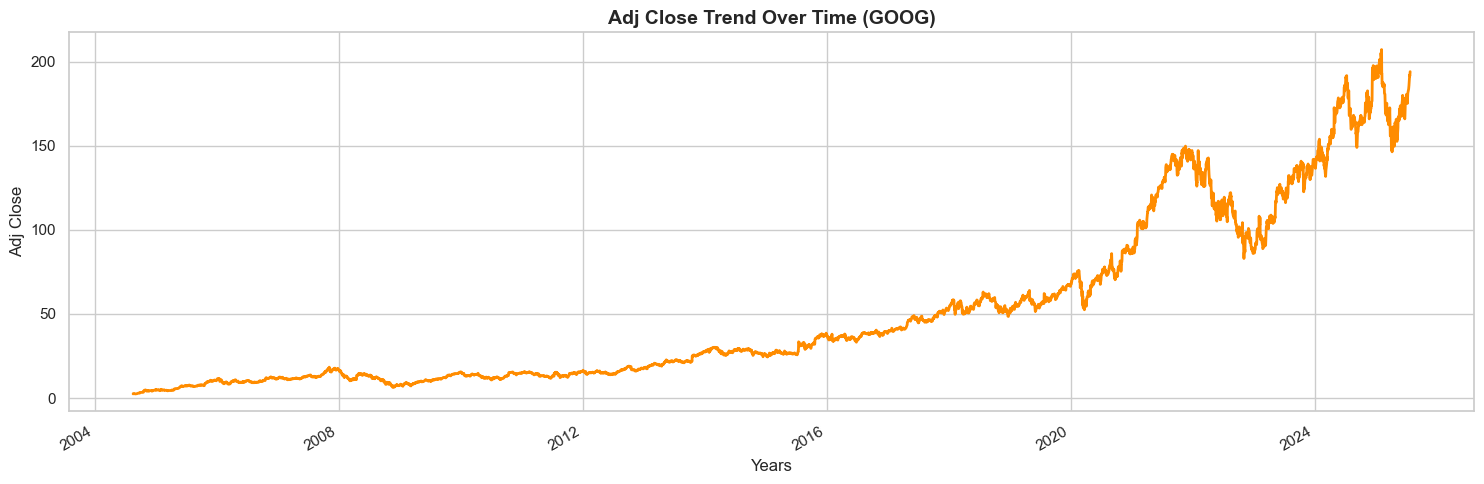

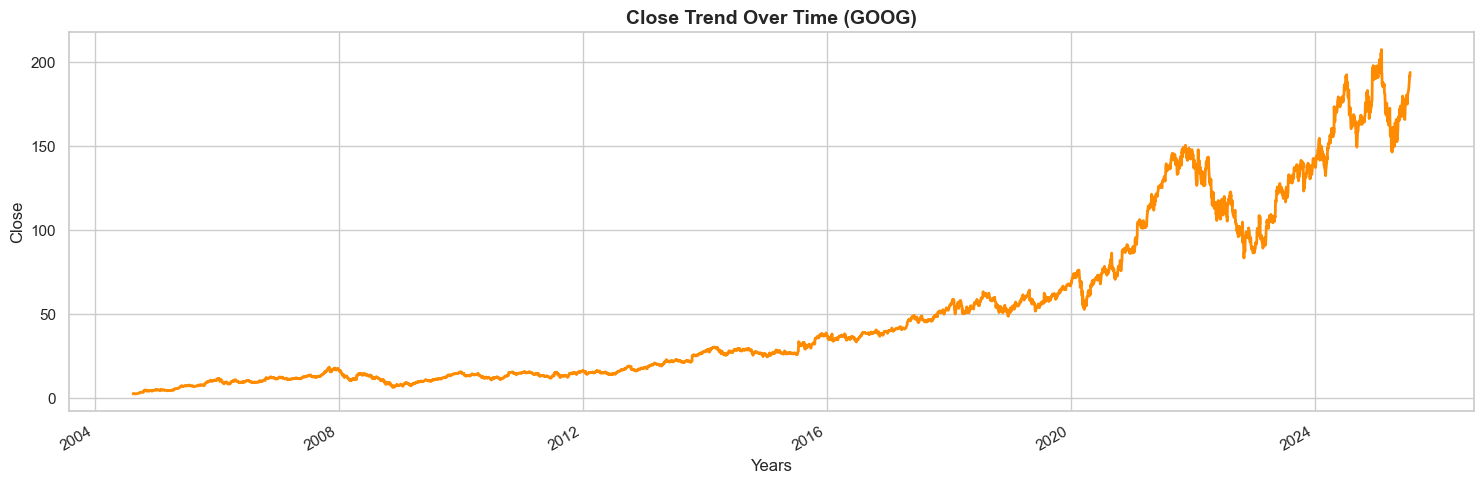

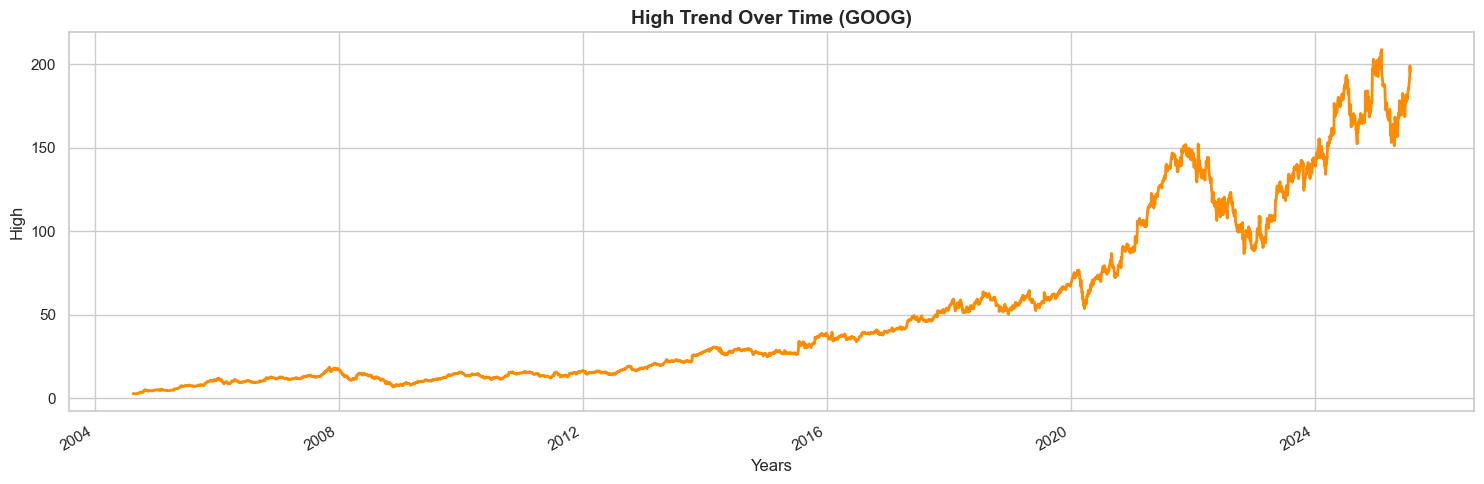

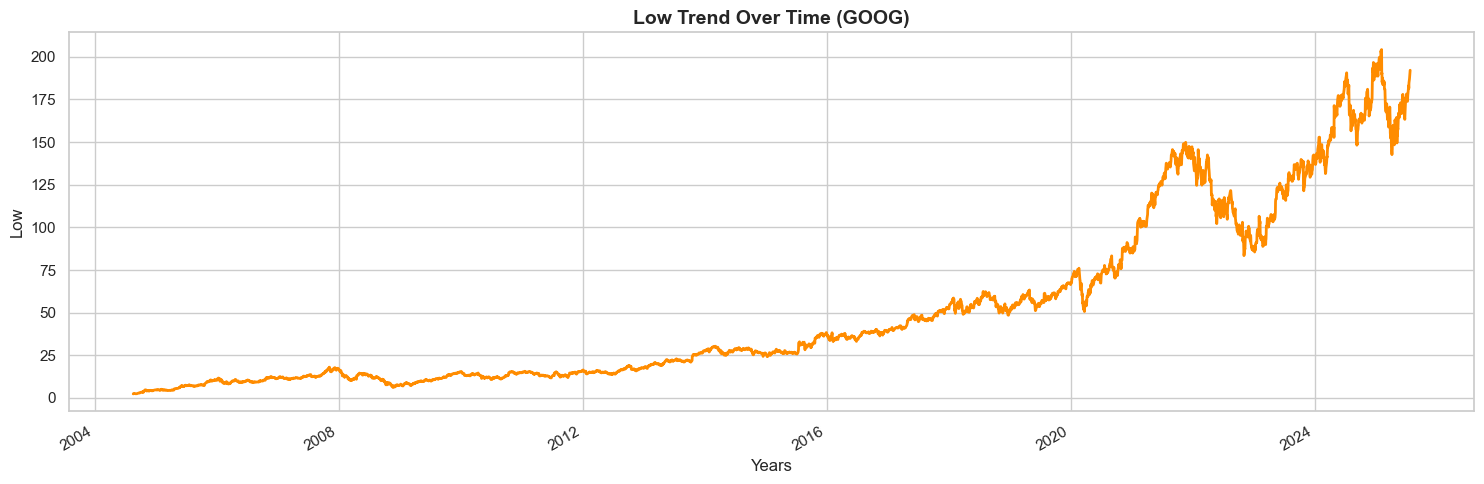

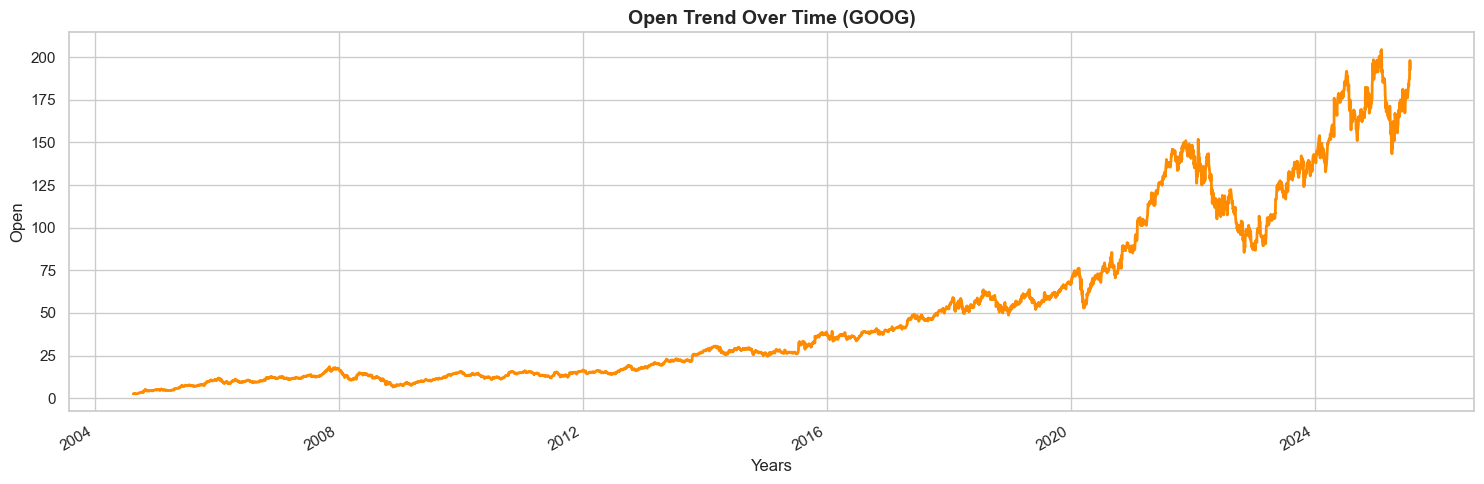

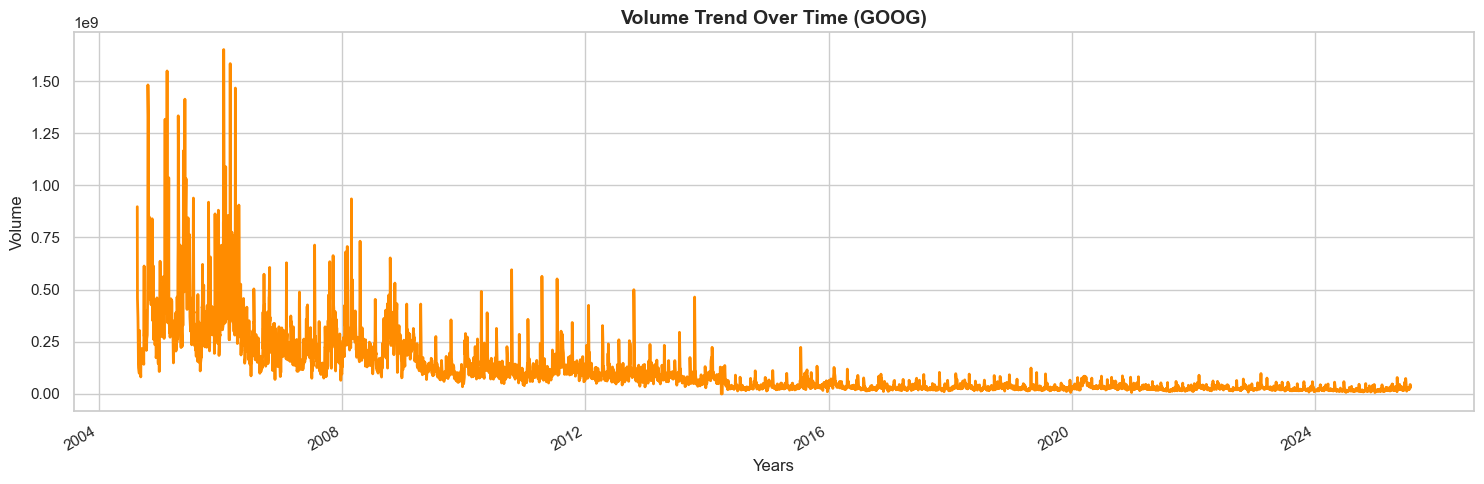

In [11]:
# 📈 Plot all available columns in the stock data using the custom plotting function

# Loop through each column in the DataFrame and generate its time series plot
for column in google_data.columns:
    plot_graph(figsize=(15, 5), values=google_data[column], column_name=column)

In [12]:
# 📊 Count the number of data records available for each year in the dataset

# google_data.index.year → Extracts the year from each datetime index entry
# .value_counts() → Counts how many times each year appears (i.e., number of records per year)
# .sort_index() → Sorts the result by year in ascending order

yearly_counts = google_data.index.year.value_counts().sort_index()

# Display the yearly record count
print(yearly_counts)

Date
2004     94
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    253
2021    252
2022    251
2023    250
2024    252
2025    140
Name: count, dtype: int64


In [13]:
# 📈 Calculate 250-day Moving Average (MA) on Adjusted Close Price

# Compute the rolling mean over a 250-day window for the 'Adj Close' column
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(window=250).mean()

# Display the last 5 rows from the first 250 rows (which include NaNs at the start)
google_data['MA_for_250_days'].iloc[0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.004293
Name: MA_for_250_days, dtype: float64

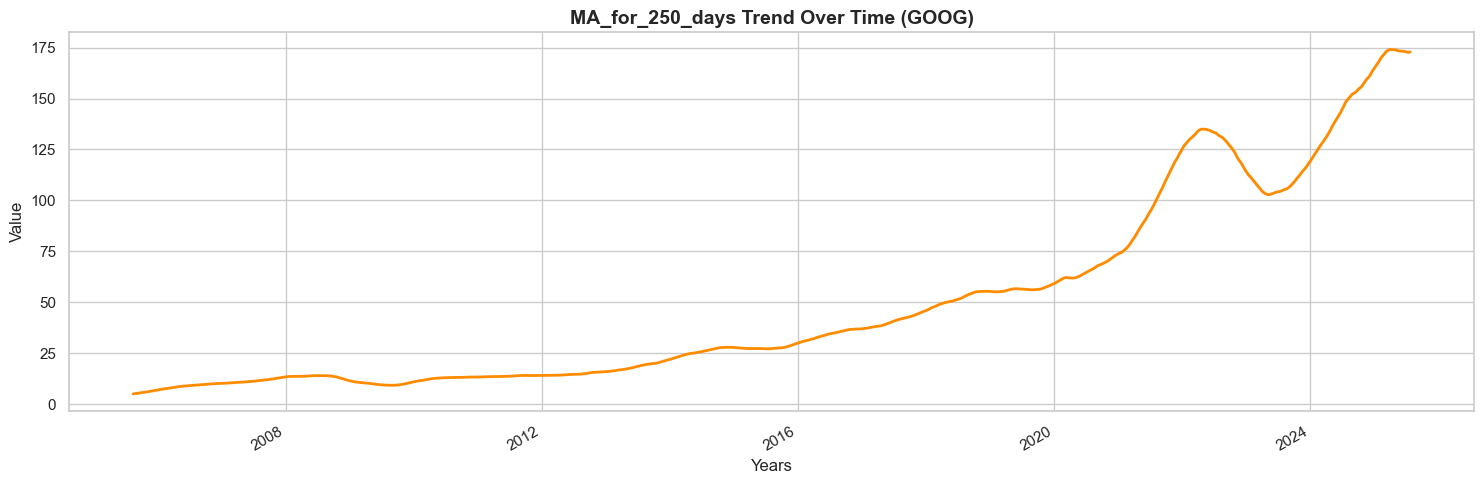

In [16]:
# 📊 Plot the 250-day Moving Average using the custom plot_graph function

# This will generate a time series plot showing the trend of the 250-day moving average
plot_graph(figsize=(15, 5), values=google_data['MA_for_250_days'], column_name='MA_for_250_days')

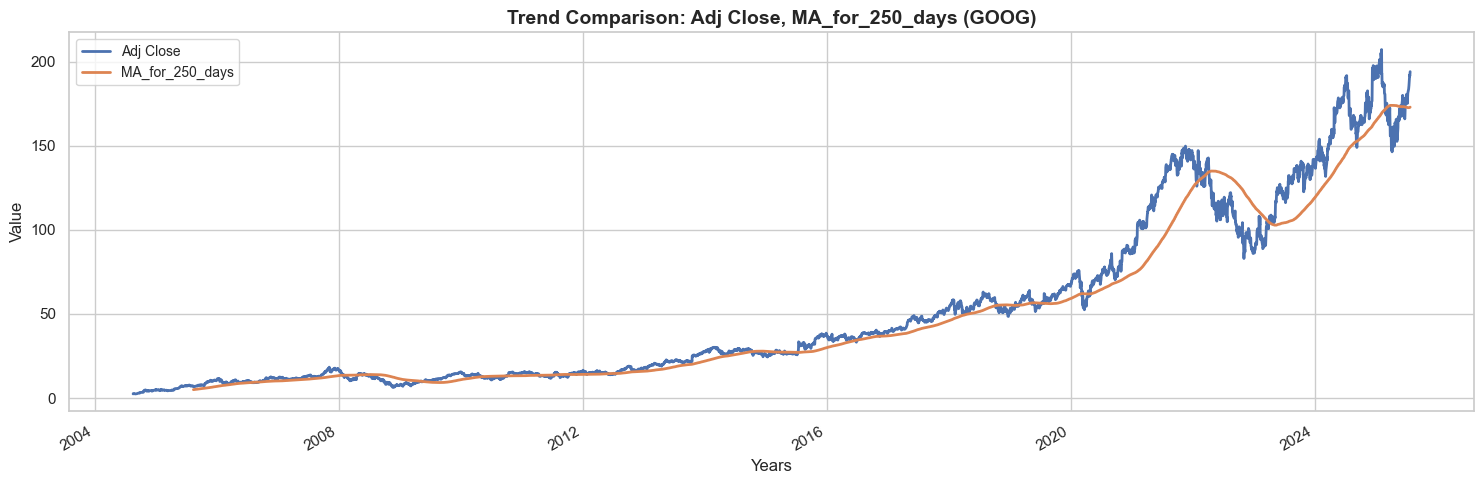

In [17]:
# 📊 Plot both Adjusted Close Price and 250-day Moving Average on the same graph

# Pass a DataFrame with both 'Adj Close' and 'MA_for_250_days' to visualize trend comparison
# This helps to see how the moving average smooths out daily price fluctuations
plot_graph(figsize=(15, 5), values=google_data[['Adj Close', 'MA_for_250_days']], column_name='MA_for_250_days')

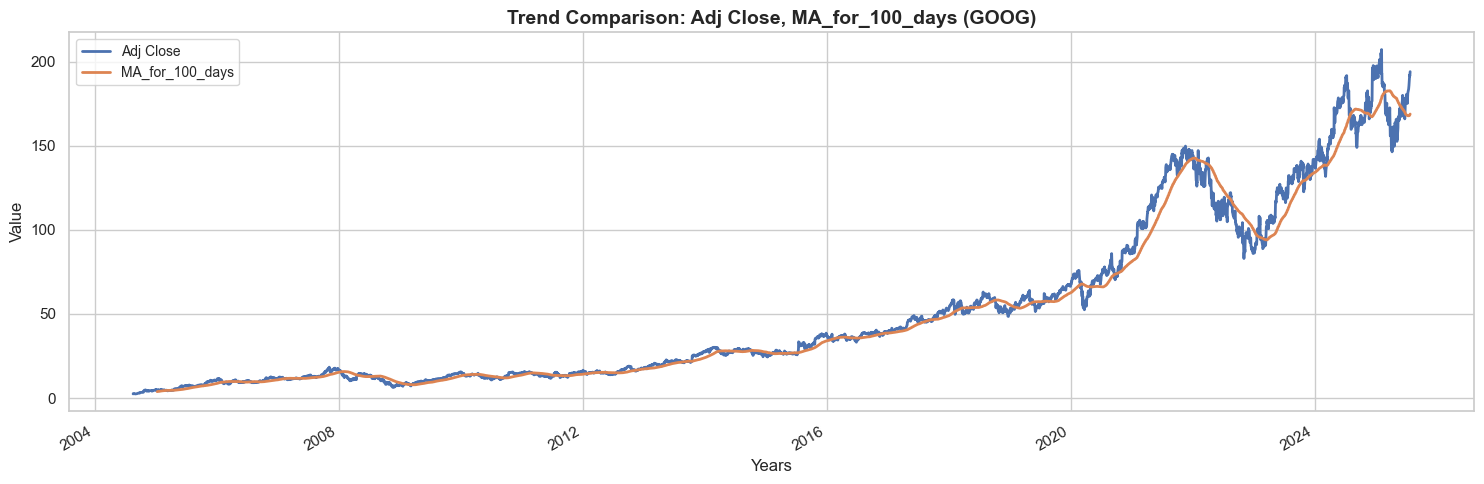

In [18]:
# 📈 Calculate 100-day Moving Average on Adjusted Close price
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(window=100).mean()

# 📊 Plot both 'Adj Close' and its 100-day Moving Average using the enhanced plot_graph function
plot_graph(figsize=(15, 5), values=google_data[['Adj Close', 'MA_for_100_days']], column_name='MA_for_100_days')

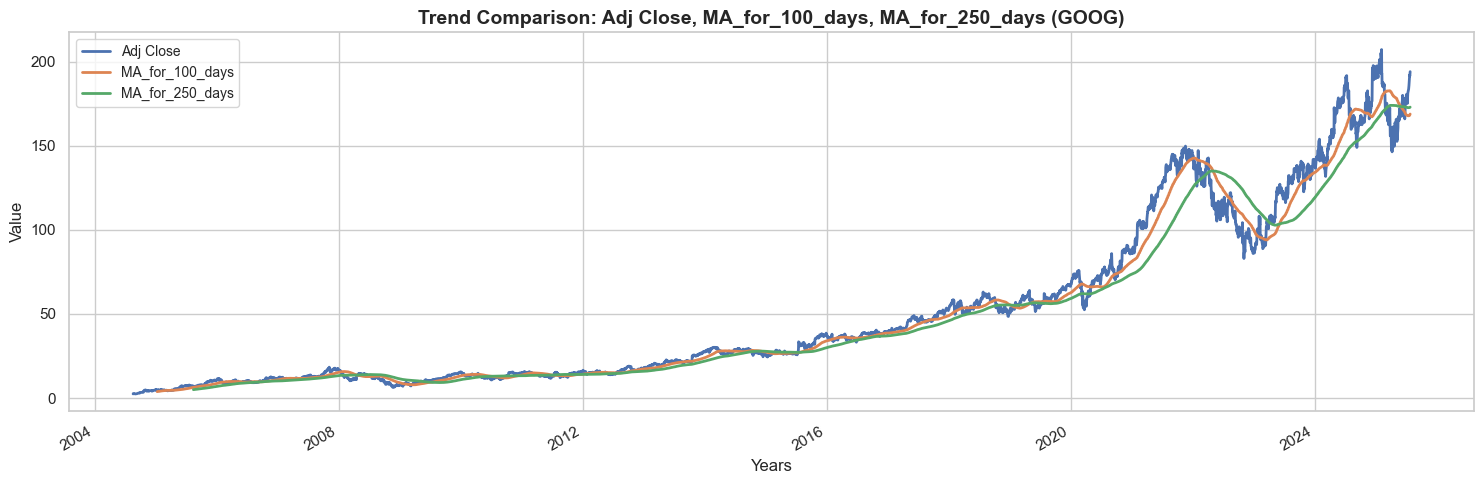

In [19]:
# 📊 Plot Adjusted Close with both 100-day and 250-day Moving Averages

# This visually compares short-term and long-term trends in the stock’s price movement
plot_graph(
    figsize=(15, 5),
    values=google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']],
    column_name='MA'
)

In [20]:
# 📉 Calculate Daily Percentage Change in Adjusted Close Price

# Compute the percentage change in 'Adj Close' from one day to the next
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()

# Display the first 5 rows showing both Adjusted Close and the corresponding daily percentage change
google_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.484366,NaN
2004-08-20,2.681699,0.079430
2004-08-23,2.708686,0.010064
2004-08-24,2.596526,-0.041408
2004-08-25,2.624504,0.010775


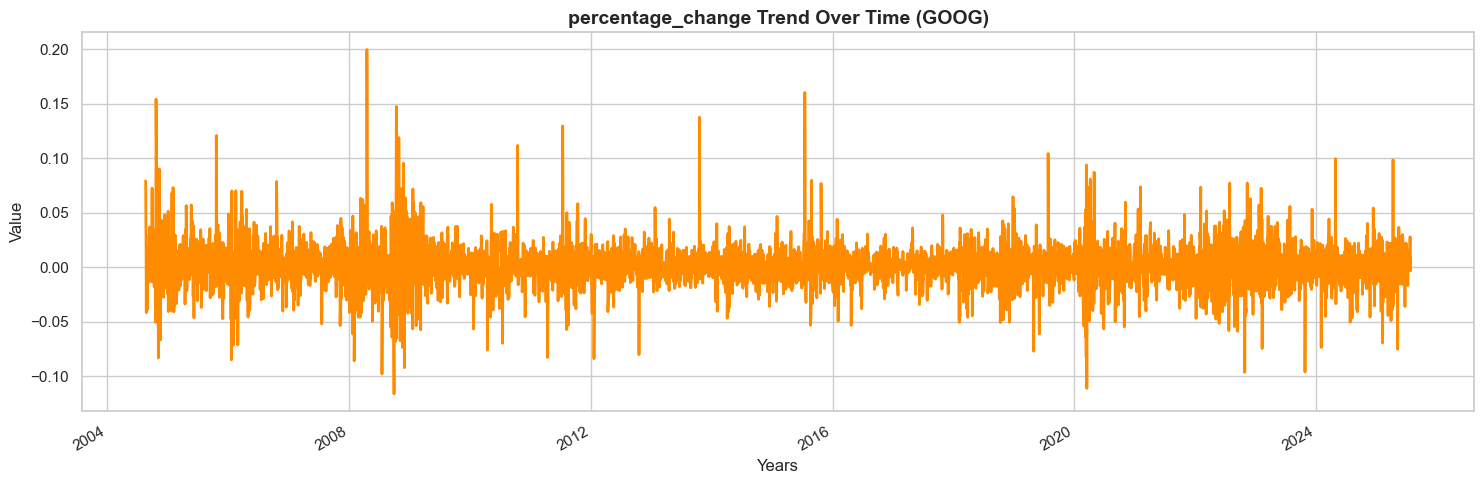

In [22]:
# 📊 Plot Daily Percentage Change in Adjusted Close Price

# Visualize how the stock's return rate fluctuates over time
plot_graph(
    figsize=(15, 5),
    values=google_data['percentage_change_cp'],
    column_name='percentage_change'
)

In [23]:
# 📦 Extract the 'Adj Close' column as a separate DataFrame
Adj_close_price = google_data[['Adj Close']]

# 📈 Get the maximum and minimum adjusted close prices over the entire time period
max_price = Adj_close_price.values.max()
min_price = Adj_close_price.values.min()

# Display the results
max_price, min_price

(np.float64(207.22454833984375), np.float64(2.476194143295288))

In [24]:
# ⚖️ Normalize the Adjusted Close prices using MinMaxScaler

# Import MinMaxScaler from scikit-learn for scaling values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler to scale values in the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the Adjusted Close prices and transform them into scaled values
scaled_data = scaler.fit_transform(Adj_close_price)

# Display the scaled values (each row corresponds to a day, between 0 and 1)
scaled_data

array([[3.99114163e-05],
       [1.00369381e-03],
       [1.13550104e-03],
       ...,
       [9.23249425e-01],
       [9.31503472e-01],
       [9.35801455e-01]])

In [25]:
len(scaled_data)

5267

In [26]:
# 🧠 Prepare data for LSTM model using a sliding window approach

# Initialize empty lists for input sequences (X) and target values (Y)
x_data = []
y_data = []

# Loop through the scaled data starting from index 100
# For each position, take the previous 100 time steps as input (x) and the current step as the label (y)
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])  # 100 previous days
    y_data.append(scaled_data[i])        # current day

# Convert lists to NumPy arrays for model compatibility
import numpy as np
x_data = np.array(x_data)
y_data = np.array(y_data)

In [27]:
# 🔍 Preview the first input-output pair for training

# Display the first input sequence (100 time steps of scaled data)
x_data[0]

# Display the corresponding output label (the 101st value in the scaled data)
y_data[0]

array([0.01131024])

In [28]:
# 🧪 Split the dataset into training and testing sets (70% train, 30% test)

# Determine the split index based on 70% of the data
splitting_len = int(len(x_data) * 0.7)

# Prepare training sets
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

# Prepare testing sets
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [29]:
# 📐 Print the shapes of training and testing datasets

# Shape of training input: (number of samples, 100 timesteps, 1 feature)
print("x_train shape:", x_train.shape)

# Shape of training output: (number of samples, 1 value per sample)
print("y_train shape:", y_train.shape)

# Shape of testing input
print("x_test shape:", x_test.shape)

# Shape of testing output
print("y_test shape:", y_test.shape)

x_train shape: (3616, 100, 1)
y_train shape: (3616, 1)
x_test shape: (1551, 100, 1)
y_test shape: (1551, 1)


In [30]:
# 🔧 Import Keras modules to build and run the LSTM model

# Sequential is used to initialize a linear stack of layers
from tensorflow.keras.models import Sequential

# Dense: Fully connected (output) layer
# LSTM: Long Short-Term Memory layer, suitable for time series data
from tensorflow.keras.layers import Dense, LSTM

In [31]:
# 🏗️ Define the LSTM Model Architecture

# Initialize a Sequential model (stack of layers)
model = Sequential()

# 🔹 First LSTM layer with 128 units
# return_sequences=True allows the next LSTM layer to receive a sequence as input
# input_shape=(100, 1): 100 time steps, 1 feature per step
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# 🔹 Second LSTM layer with 64 units
# return_sequences=False: final LSTM output passed to Dense layers (not sequences anymore)
model.add(LSTM(64, return_sequences=False))

# 🔹 Dense layer with 25 neurons to process extracted features
model.add(Dense(25))

# 🔹 Final output layer with 1 neuron for predicting the next price
model.add(Dense(1))

c:\Users\shail\anaconda3\envs\SPP\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# ⚙️ Compile the LSTM model before training

# 'adam' optimizer is efficient and widely used for deep learning models
# 'mean_squared_error' is used as the loss function for regression problems like stock price prediction
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [33]:
# 🏋️ Train the LSTM model on the training data

# batch_size = 5 → model updates weights after every 5 samples
# epochs = 10 → iterate 10 times over the entire training dataset
model.fit(
    x_train,
    y_train,
    batch_size=5,
    epochs=10
)

Epoch 1/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 6.6310e-04
Epoch 2/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 3.5544e-05
Epoch 3/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 2.9770e-05
Epoch 4/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 2.6970e-05
Epoch 5/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 2.0778e-05
Epoch 6/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 2.0641e-05
Epoch 7/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 1.6768e-05
Epoch 8/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 1.5567e-05
Epoch 9/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 1.6848e-05
Epoch 10/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 1.1679e-05


In [34]:
# 📋 Print a detailed summary of the model architecture

# This displays:
# - Layer types (LSTM, Dense, etc.)
# - Output shapes at each layer
# - Number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [35]:
# 🔮 Generate predictions using the trained LSTM model

# Use the trained model to predict on the testing input sequences
predictions = model.predict(x_test)

# Display the raw (scaled) predictions
predictions

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


array([[0.2581696 ],
       [0.25624603],
       [0.2560694 ],
       ...,
       [0.8940367 ],
       [0.88989735],
       [0.8950644 ]], dtype=float32)

In [36]:
# 🔁 Convert scaled predictions back to actual stock prices

# Since the model predicted on scaled data, we use the same scaler to reverse the scaling
inv_predictions = scaler.inverse_transform(predictions)

# Display the predicted stock prices in original price scale (e.g., in USD)
inv_predictions

array([[ 55.335995],
       [ 54.942146],
       [ 54.90598 ],
       ...,
       [185.52873 ],
       [184.68121 ],
       [185.73917 ]], dtype=float32)

In [37]:
# 🔁 Convert actual scaled test values back to original stock prices

# Inverse transform the true y_test values using the same MinMaxScaler
inv_y_test = scaler.inverse_transform(y_test)

# Display the original stock prices for the test set
inv_y_test

array([[ 56.3386116 ],
       [ 56.37241364],
       [ 55.49314117],
       ...,
       [191.50999451],
       [193.19999695],
       [194.08000183]])

In [38]:
# 📏 Calculate Root Mean Squared Error (RMSE) to evaluate model accuracy

# RMSE measures the average magnitude of error between predicted and actual values
# Lower RMSE indicates better model performance
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))

# Display the RMSE value
rmse

np.float64(4.551602467386253)


#### 📌 Interpretation:
- This means that, on average, the model's predicted stock prices deviate by approximately **\$4.55** from the actual prices.
- Given the stock price range (e.g., \$2 – \$195 for Google over 25 years), this is a relatively **low error**, suggesting that the model has learned the temporal patterns effectively.
- However, for financial use cases where even minor price differences can be critical, this model may need further optimization, tuning, or additional feature inputs.

In [39]:
# 🧾 Create a DataFrame to compare actual vs predicted stock prices

# We reshape the arrays to 1D for compatibility and align them with their original date indices
# The index starts from (splitting_len + 100) because the first 100 days were used for each input sequence

ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),   # Actual prices
        'predictions': inv_predictions.reshape(-1)      # Predicted prices
    },
    index=google_data.index[splitting_len + 100:]       # Aligning with actual dates
)

# Display the first few rows of the comparison DataFrame
ploting_data.head()

,original_test_data,predictions
Date,,
2019-05-24,56.338612,55.335995
2019-05-28,56.372414,54.942146
2019-05-29,55.493141,54.905979
2019-05-30,55.567200,54.222553
2019-05-31,54.855431,54.137688


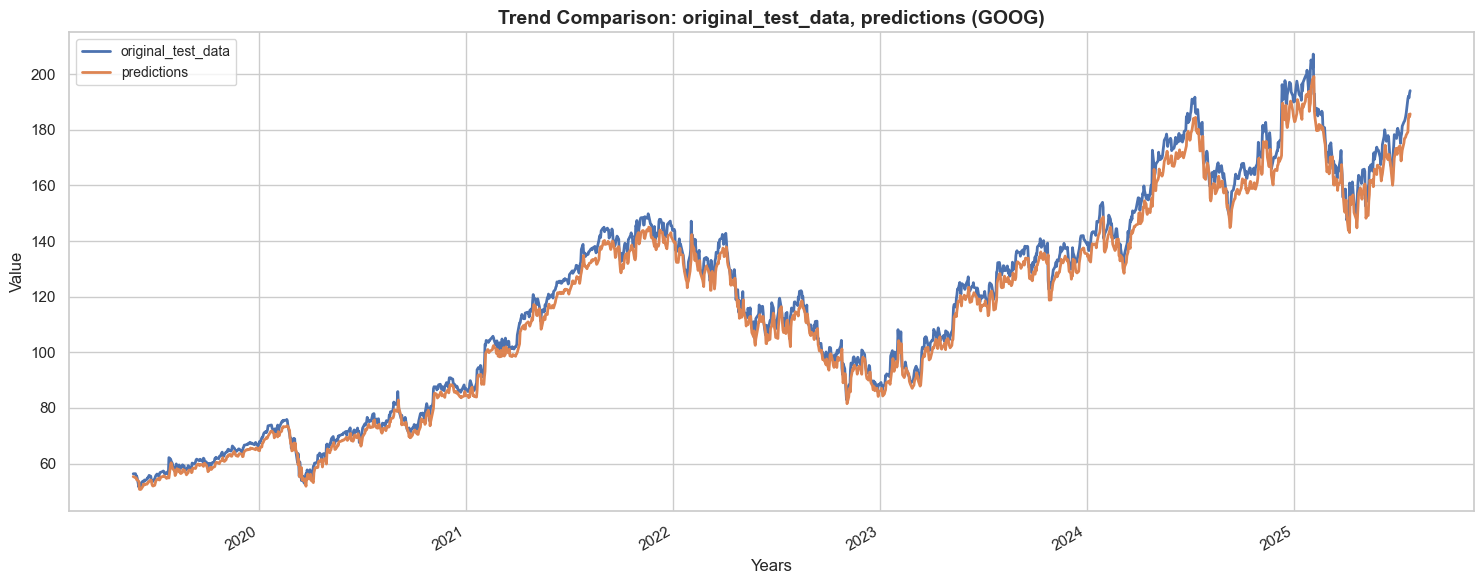

In [40]:
# 📊 Plot Actual vs Predicted Stock Prices on the Test Set

# This will display both original test data and model predictions over time
# Helpful for visually assessing how well the model captured price movements

plot_graph(
    figsize=(15, 6),
    values=ploting_data,
    column_name='test data'
)

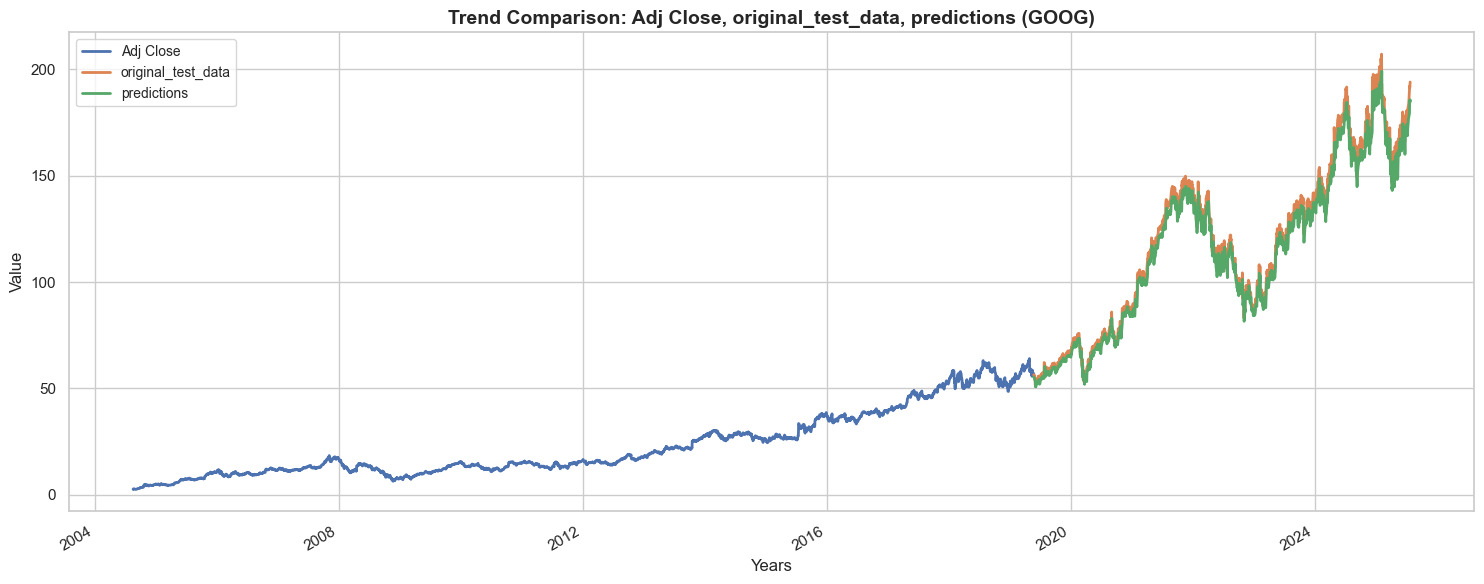

In [41]:
plot_graph(
    figsize=(15, 6),
    values=pd.concat([Adj_close_price[:splitting_len + 100], ploting_data], axis=0),
    column_name='Training + Test + Predictions'
)

In [42]:
# 💾 Save the trained LSTM model to a .keras file

# This saves the entire model architecture, weights, and training configuration
# Useful for future predictions or deployment without retraining
model.save("SPP.keras")